In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
import urllib.request

url = "https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv"
filename = 'data/data.csv'
urllib.request.urlretrieve(url, filename)

('data/data.csv', <http.client.HTTPMessage at 0x1e344bcc470>)

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


# 6.2 Data cleaning and preparation

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.status = df.status.map({1: 'ok', 2: 'default', 0: 'unk'})
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
for c in ["income", "assets", "debt"]:
    df[c] = df[c].replace({99999999: np.nan})

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
y_full_train = (df_full_train.status == 'default').astype('int').values

del df_train["status"]
del df_val["status"]
del df_test["status"]
del df_full_train['status']

# 6.3 Decision trees

In [16]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [17]:
xi = df_train.iloc[0].to_dict()

In [18]:
assess_risk(xi)

'ok'

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [22]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [23]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [34]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [38]:
roc_auc_score(y_val, y_pred)

0.6537350754401686

In [39]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [48]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
print('validation: ',roc_auc_score(y_val, y_pred))
y_pred = dt.predict_proba(X_train)[:, 1]
print('train: ',roc_auc_score(y_train, y_pred))

validation:  0.6685264343319367
train:  0.7054989859726213


In [41]:
from sklearn.tree import export_text

In [49]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



In [44]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

# 6.4 Decision tree algo

In [50]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]
df_example = pd.DataFrame(data, columns = ['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [51]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [52]:
from IPython.display import display

In [67]:
Ts = [0, 2000,3000,4000,5000,8000]
for T in Ts:
    print(T)
    df_left = df_example[df_example['assets'] <= T]
    df_right = df_example[df_example['assets'] > T]
    display(df_left)
    # print(df_left.status.value_counts(normalize=True))
    df_left_error = df_left.status.value_counts(normalize=True).get('ok', 0)
    print('error: ', round(df_left_error, 2))
    display(df_right)
    # print(df_right.status.value_counts(normalize=True))
    df_right_error = df_right.status.value_counts(normalize=True).get('default', 0)
    print('error: ', round(df_right_error, 2))
    print('******************')
    print()

0


,assets,status
2,0,default


error:  0


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


error:  0.43
******************

2000


,assets,status
1,2000,default
2,0,default


error:  0


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


error:  0.33
******************

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


error:  0


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


error:  0.2
******************

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


error:  0.25


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


error:  0.25
******************

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


error:  0.5


,assets,status
0,8000,default
6,9000,ok


error:  0.5
******************

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


error:  0.43


,assets,status
6,9000,ok


error:  0
******************



In [68]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default']
]
df_example2 = pd.DataFrame(data, columns = ['assets', 'debt', 'status'])
df_example2

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [69]:
df_example2.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [71]:
thresholds = {
    'assets' : [0, 2000,3000,4000,5000,8000],
    'debt' : [500, 1000, 2000]
}

for feature, Ts in thresholds.items():
    print('##########################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example2[df_example2[feature] <= T]
        df_right = df_example2[df_example2[feature] > T]
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        # df_left_error = df_left.status.value_counts(normalize=True).get('ok', 0)
        # print('error: ', round(df_left_error, 2))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        # df_right_error = df_right.status.value_counts(normalize=True).get('default', 0)
        # print('error: ', round(df_right_error, 2))
        print('******************')
        print()

##########################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
******************

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
******************

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
******************

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
******************

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
******************

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64
******************

##########################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64
******************

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64
******************

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64
******************



# 6.5 Fine tuning

In [73]:
for d in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.754
  10 -> 0.703
  15 -> 0.661
  20 -> 0.655
None -> 0.661


In [81]:
scores = []
for d in [4,5,6, 7, 10, 15, 20, None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append(((d, s, auc)))
        # print('%4s -> %.3f' % (d, s, auc))
df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_leaf','auc'])
df_scores

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726
...,...,...,...
67,NaN,15,0.787296
68,NaN,20,0.781726
69,NaN,100,0.779474
70,NaN,200,0.768479


In [82]:
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
40,10.0,15,0.792176
67,NaN,15,0.787296
49,15.0,15,0.786128
58,20.0,15,0.786076
41,10.0,20,0.786001


In [83]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values='auc')
df_scores_pivot.round(3)

max_depth,NaN,4.0,5.0,6.0,7.0,10.0,15.0,20.0
min_samples_leaf,,,,,,,,
1,0.658,0.761,0.767,0.753,0.740,0.691,0.654,0.650
2,0.679,0.761,0.767,0.767,0.746,0.717,0.695,0.684
5,0.724,0.761,0.768,0.761,0.757,0.729,0.719,0.718
10,0.764,0.761,0.762,0.778,0.764,0.768,0.761,0.759
15,0.787,0.764,0.772,0.785,0.779,0.792,0.786,0.786
20,0.782,0.761,0.774,0.773,0.781,0.786,0.782,0.784
100,0.779,0.756,0.763,0.776,0.780,0.779,0.780,0.779
200,0.768,0.747,0.759,0.768,0.768,0.768,0.768,0.768
500,0.680,0.680,0.680,0.680,0.680,0.680,0.680,0.680


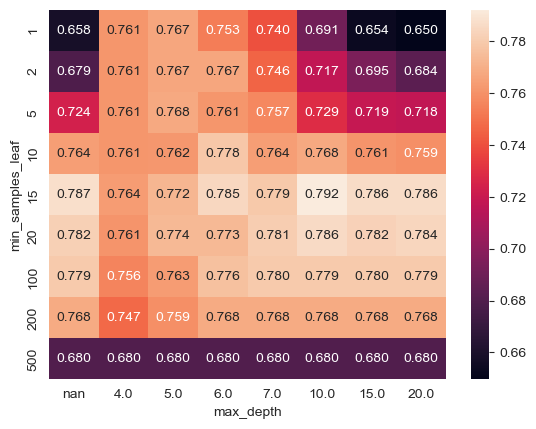

In [84]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')
plt.show()

In [85]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

# y_pred = dt.predict_proba(X_val)[:, 1]
# auc = roc_auc_score(y_val, y_pred)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# 6.6 Ensemble learning and Random forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [93]:
y_pred = rf.predict_proba(X_val)[:,1]

In [94]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [100]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))
df_scores = pd.DataFrame(scores, columns=['n_estimators','auc'])
df_scores.head()

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082


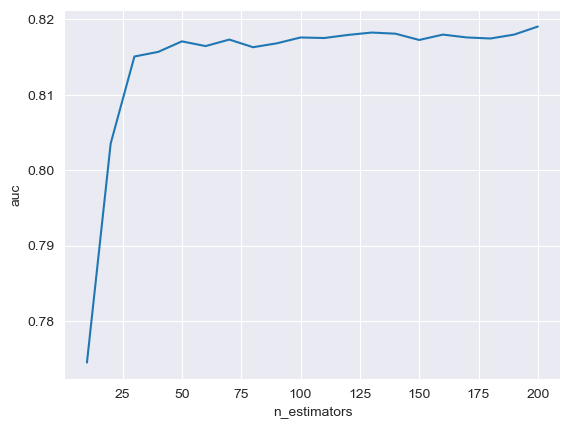

In [102]:
plt.plot(df_scores['n_estimators'], df_scores['auc'])
plt.xlabel('n_estimators')
plt.ylabel('auc')
plt.show()

In [103]:
scores = []

for d in [5,10,15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators','auc'])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


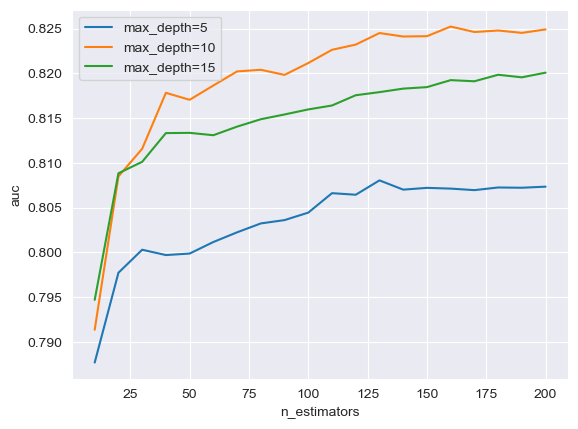

In [104]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset['n_estimators'], df_subset['auc'], label='max_depth=%d' % d)
    plt.xlabel('n_estimators')
    plt.ylabel('auc')
plt.legend()
plt.show()

In [105]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=10, random_state=1, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])
df_scores.head()


,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


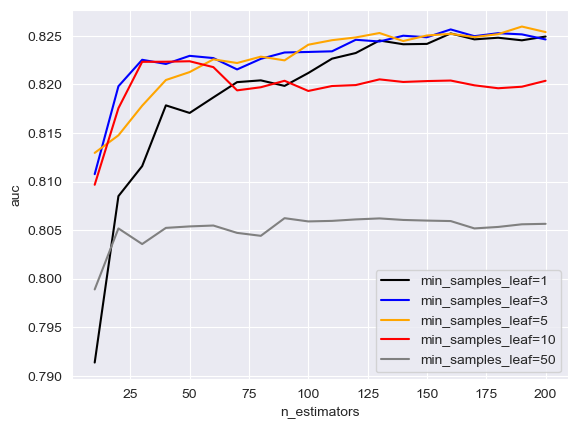

In [106]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
for s,c  in zip([1, 3, 5, 10, 50], colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset['n_estimators'], df_subset['auc'], label='min_samples_leaf=%d' % s, color = c)
    plt.xlabel('n_estimators')
    plt.ylabel('auc')
plt.legend()
plt.show()

In [107]:
df_scores.sort_values('auc', ascending=False).head()

,min_samples_leaf,n_estimators,auc
58,5,190,0.825952
35,3,160,0.825655
59,5,200,0.825383
52,5,130,0.825286
37,3,180,0.825268


In [109]:
# Best values
s = 3
d = 10
n = 200

rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1, min_samples_leaf=s, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=1)

# 6.7 Gradient boosting and XGBoost

In [110]:
import xgboost as xgb

In [116]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [120]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [121]:
y_pred = model.predict(dval)

In [122]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [123]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [126]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals = watchlist)

In [128]:
s = output.stdout

In [131]:
s.split('\n')[0].split('\t')

['[0]', 'train-auc:0.86730', 'val-auc:0.77938']

In [132]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        results.append((it, train, val))
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [135]:
df_score = parse_xgb_output(output)
df_score.head()

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729


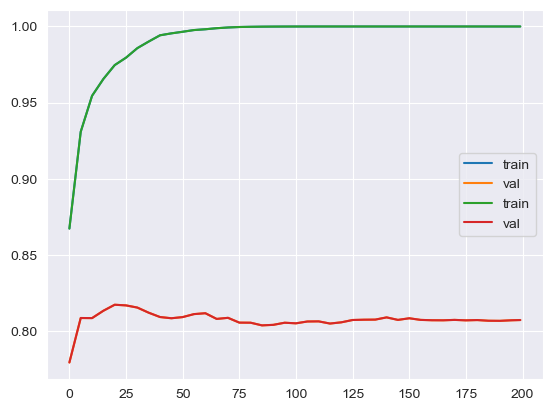

In [137]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()

# 6.8 XGBoost parameter tuning

In [138]:
scores = {}

In [147]:
%%capture output
    xgb_params = {
        'eta': 0.01,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1
    }
    
    model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals = watchlist)
    

In [148]:
key = 'eta=%s' % (xgb_params["eta"])
scores[key] = parse_xgb_output(output)

In [150]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

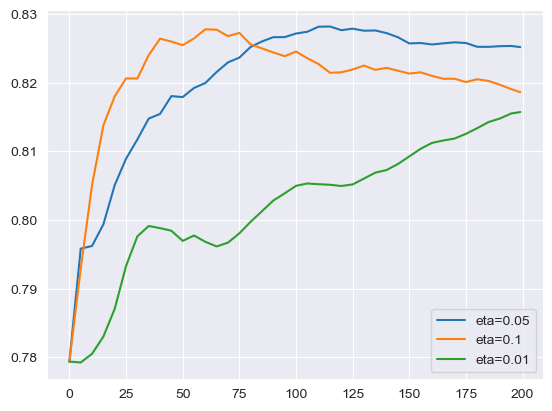

In [157]:
etas = ['eta=0.05', 'eta=0.1', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()
plt.show()

In [158]:
#Best eta = 0.1

In [159]:
scores = {}

In [166]:

%%capture output
xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)



In [167]:
key = 'max_depth=%d' % (xgb_params["max_depth"])
scores[key] = parse_xgb_output(output)
scores.keys()


dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10'])

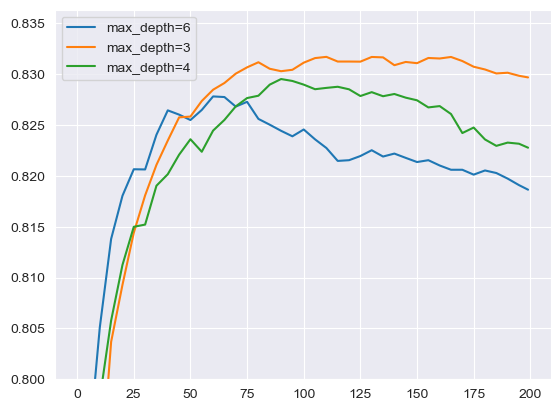

In [170]:
max_depths = ['max_depth=6', 'max_depth=3', 'max_depth=4']
for d in max_depths:
    df_score = scores[d]
    plt.plot(df_score.num_iter, df_score.val_auc, label=d)
plt.ylim(0.8)
plt.legend()
plt.show()

In [171]:
# Best max_depth = 3

In [173]:
scores = {}

In [179]:
%%capture output
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)



In [180]:
key = 'min_child_weight=%d' % (xgb_params["min_child_weight"])
scores[key] = parse_xgb_output(output)
scores.keys()



dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

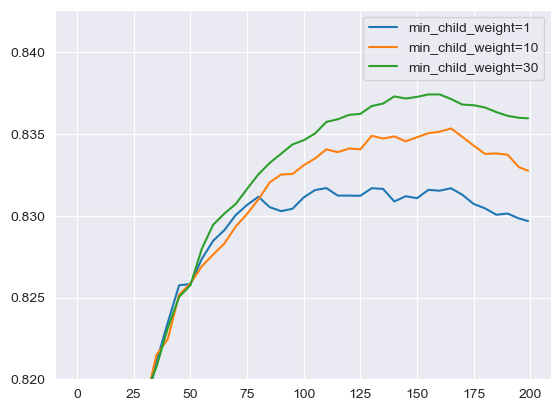

In [184]:
min_child_weights = ['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30']
for w in min_child_weights:
    df_score = scores[w]
    plt.plot(df_score.num_iter, df_score.val_auc, label=w)
plt.ylim(0.82)
plt.legend()
plt.show()

In [185]:
# Best min_child_weight = 1

In [187]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

# 6.9 Selecting the final model

In [188]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [191]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7848562640769174

In [189]:
s = 3
d = 10
n = 200
rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1, min_samples_leaf=s)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [192]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [190]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [193]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8309347073212081

In [207]:
dv = DictVectorizer(sparse=False)
dicts_full_train = df_full_train.fillna(0).to_dict(orient='records')
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [208]:
dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, label=y_test, feature_names=list(dv.get_feature_names_out()))

In [209]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dfull_train, num_boost_round=175)

In [210]:
y_pred = model.predict(dtest)

In [211]:
roc_auc_score(y_test, y_pred)

0.8335491911441278